#

In [12]:
%load_ext autoreload
%autoreload 2

from system.system_development.strategies.registry import STRATEGIES

# from system.system_development.strategies.trend_pullback_v1.run_backtest import run_backtest_for_default_universe
# from system.system_development.strategies.trend_pullback_v1.config import StrategyParams

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



=== Running backtest for ^GSPC ===

Signal counts for ^GSPC:
Signal
0    843
1     85
Name: count, dtype: int64

Exit breakdown for ^GSPC:
  All trades       :   42 trades, avg holding   0.48 days
  stop          :   15 trades, avg holding   0.78 days
  trend_exit    :   24 trades, avg holding   0.16 days
  tp            :    3 trades, avg holding   1.49 days


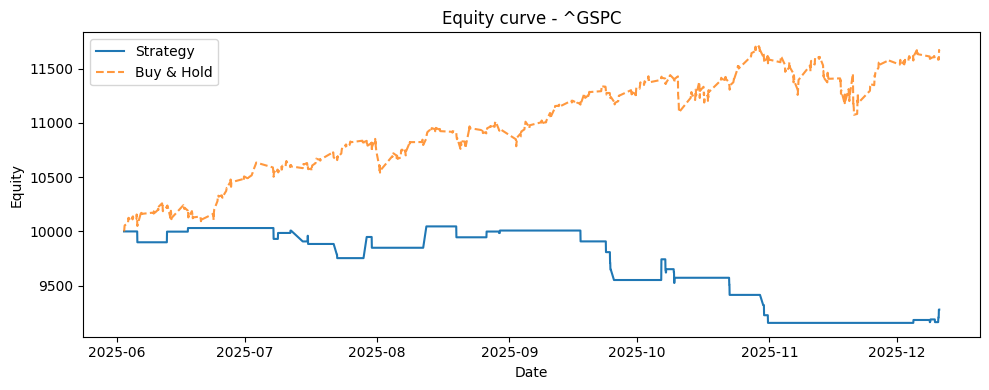


=== Running backtest for ^NDX ===

Signal counts for ^NDX:
Signal
0    845
1     83
Name: count, dtype: int64

Exit breakdown for ^NDX:
  All trades       :   42 trades, avg holding   0.48 days
  stop          :   16 trades, avg holding   0.68 days
  tp            :    6 trades, avg holding   1.19 days
  trend_exit    :   20 trades, avg holding   0.09 days


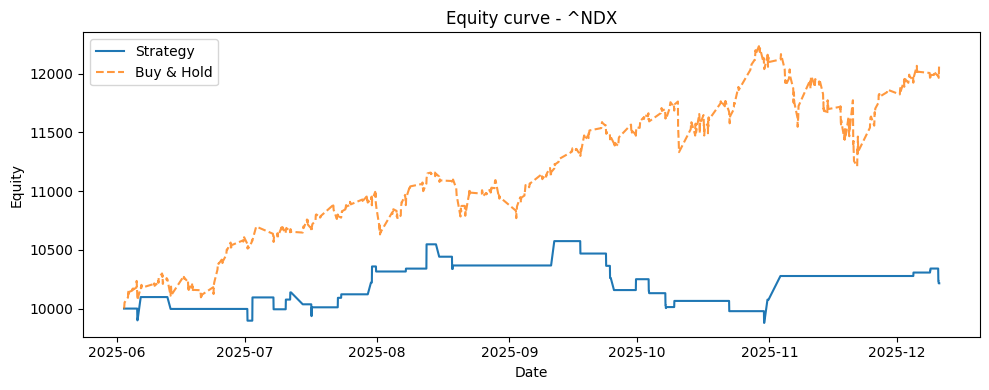


=== Running backtest for ^FTSE ===

Signal counts for ^FTSE:
Signal
0    1128
1     102
Name: count, dtype: int64

Exit breakdown for ^FTSE:
  All trades       :   41 trades, avg holding   0.75 days
  tp            :   11 trades, avg holding   1.22 days
  trend_exit    :   17 trades, avg holding   0.39 days
  stop          :   13 trades, avg holding   0.81 days


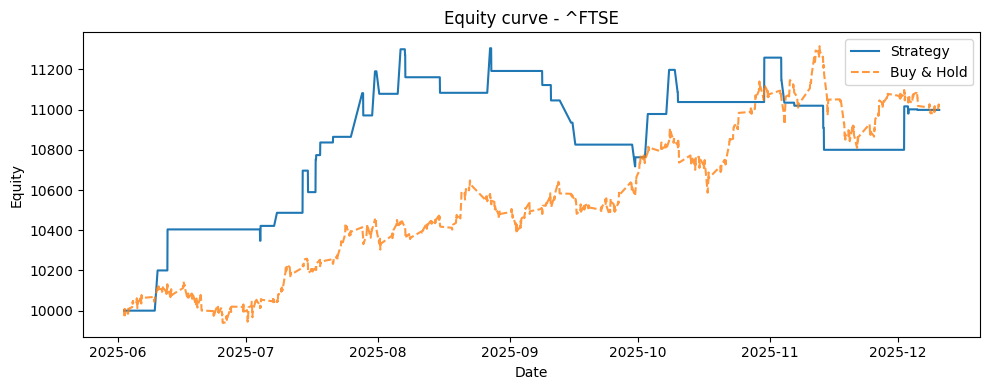


=== Running backtest for EURUSD=X ===

Signal counts for EURUSD=X:
Signal
 0    2907
 1     200
-1     172
Name: count, dtype: int64

Exit breakdown for EURUSD=X:
  All trades       :  172 trades, avg holding   0.15 days
  stop          :   58 trades, avg holding   0.14 days
  tp            :   38 trades, avg holding   0.30 days
  trend_exit    :   76 trades, avg holding   0.07 days


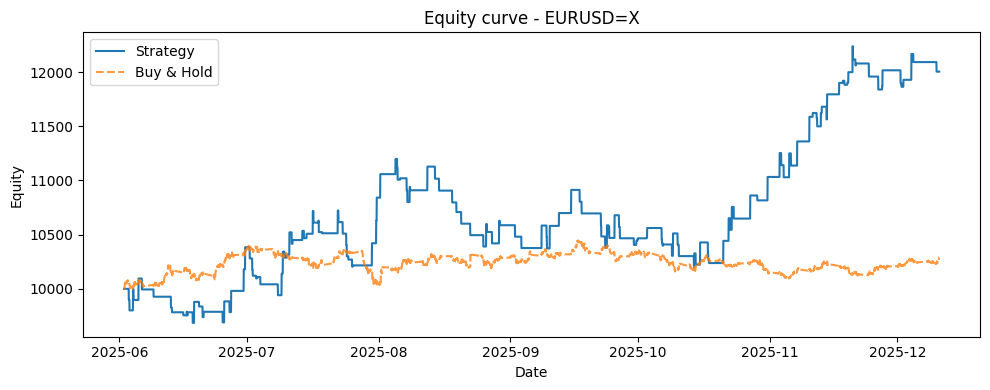


=== Backtest statistics for PORTFOLIO_EQUAL_WEIGHT ===
start_equity        : 10000.0000
end_equity          : 12004.1334
total_return_pct    :    20.04%
max_drawdown_pct    :    -8.94%
num_trades          : 297.0000
win_rate_pct        :    43.77%
avg_win             : 122.4059
avg_loss            : -83.3279
profit_factor       :   1.1861
sharpe_ratio        :   1.5290


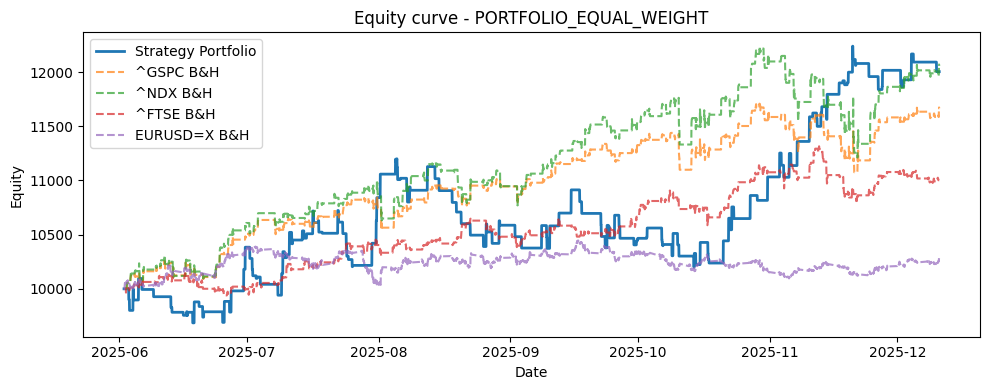


=== Backtest statistics for ^GSPC ===
start_equity        : 10000.0000
end_equity          : 9279.3033
total_return_pct    :    -7.21%
max_drawdown_pct    :    -8.86%
num_trades          :  42.0000
win_rate_pct        :    40.48%
avg_win             :  68.6112
avg_loss            : -75.4835
profit_factor       :   0.6181
sharpe_ratio        :  -3.2631

=== Backtest statistics for ^NDX ===
start_equity        : 10000.0000
end_equity          : 10215.1516
total_return_pct    :     2.15%
max_drawdown_pct    :    -6.58%
num_trades          :  42.0000
win_rate_pct        :    50.00%
avg_win             :  97.4545
avg_loss            : -87.2092
profit_factor       :   1.1175
sharpe_ratio        :   0.8755

=== Backtest statistics for ^FTSE ===
start_equity        : 10000.0000
end_equity          : 10998.3953
total_return_pct    :     9.98%
max_drawdown_pct    :    -5.20%
num_trades          :  41.0000
win_rate_pct        :    46.34%
avg_win             : 149.7593
avg_loss            : -83.9

In [13]:
if __name__ == "__main__":

    name = "trend_pullback_v1" #"trend_pullback_v1" "breakout_v1"
    run_fn, ParamsCls = STRATEGIES[name]

    params_cash = ParamsCls(
        entry_mode="shallow_pullback",
        equity_mode="cash",
        exit_mode="fixed_rr",
        tp_atr_mult=2,
        risk_per_trade=0.01,
    )

    results_cash = run_fn(
        params=params_cash,
        start="2025-6-01",
        end=None,
        interval="1h",
        plot=True,
        portfolio=True,
        show_benchmark=True,
    )


In [4]:
 # %load_ext autoreload
# %autoreload 2
#
# from system.system_development.strategies.breakout_v1.config import StrategyParams
# from system.system_development.strategies.breakout_v1.run_backtest import run_backtest_for_default_universe
#
#
# params = StrategyParams(
#     donchian_lookback=20,
#     vol_lookback=50,
#     low_vol_mult=0.8,
#     risk_per_trade=0.01,
#     equity_mode="mtm",
#     long_only=True,
# )
#
# results = run_backtest_for_default_universe(
#     params=params,
#     start="2024-01-01",
#     end=None,
#     interval="4h",
#     plot=True,
#     portfolio=True,
#     show_benchmark=True,
# )

# Debug

In [ ]:
from system_development.engine.data_loader import download_price_data
from system_development.strategies.trend_pullback_v1.config import DEFAULT_PARAMS
from system_development.strategies.trend_pullback_v1.rules import prepare_dataframe

symbol = "^GSPC"

raw = download_price_data(symbol, start="2015-01-01", interval="1d")
df = prepare_dataframe(raw, DEFAULT_PARAMS)

df["Signal"].value_counts()
df[["Close", "EMA_Fast", "EMA_Slow", "RSI", "ADX", "Trend", "Signal"]].tail()
